In [1]:
import sys
sys.path.append('../../../scripts/')

from paths import get_data_paths

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
DATA_FOLDER = get_data_paths()['human_ovarian_cancer']
OUT_FOLDER = DATA_FOLDER / 'subset/'
os.makedirs(OUT_FOLDER, exist_ok=True)

In [5]:
df = pd.read_parquet(DATA_FOLDER / 'transcripts.parquet')

In [8]:
annot = pd.read_csv(DATA_FOLDER / 'Xenium_Prime_Ovarian_Cancer_FFPE_XRrun_cell_groups.csv')
annot = annot.set_index('cell_id').group

In [40]:
df_subs = df.query('(x_location < 9000) & (x_location > 8500) & (y_location < 5000) & (y_location > 4500)').copy()
df_subs.shape[0]

291586

In [41]:
annot.reindex(df_subs.cell_id).value_counts()

group
Fallopian Tube Epithelium               110822
SOX2-OT+ Tumor Cells                     36447
Stromal Associated Fibroblasts           28904
Tumor Cells                              26001
Stromal Associated Endothelial Cells     18118
Smooth Muscle Cells                      16702
Ciliated Epithelial Cells                 8097
T and NK Cells                            5408
Macrophages                               2669
Tumor Associated Fibroblasts              1717
Granulosa Cells                            977
Proliferative Tumor Cells                  715
Name: count, dtype: int64

In [36]:
df_subs.to_parquet(f'{OUT_FOLDER}/transcripts.parquet')

In [48]:
df_subs['cell_type'] = annot.reindex(df_subs.cell_id).values
df_subs.loc[df_subs['cell_type'].isna(), 'cell_type'] = 'Unknown'

In [60]:
# pd.Series(df_subs.feature_name.unique()).str[:5].value_counts()
# mask = [df_subs.feature_name.str[:5].str.startswith(p).values for p in ['Depre', 'NegCo', 'Unass']]
# mask = ~(mask[0] | mask[1] | mask[2])

# df_subs[mask].feature_name.unique().size

In [62]:
df_subs.feature_name.unique().size

5250

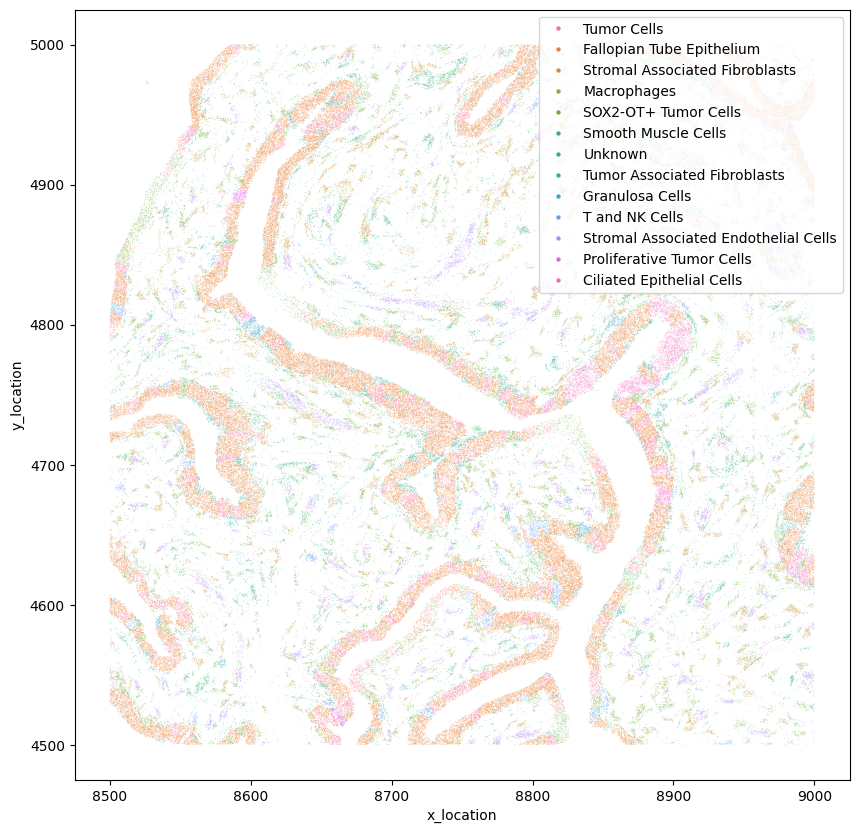

In [49]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
  data=df_subs, x='x_location', y='y_location', hue='cell_type', s=0.1
)
plt.legend(markerscale=10)